In [16]:
import yaml

with open("../config.yaml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)


In [17]:
cfg

{'video_source_folder': '/datadrive/test_dataset/'}

In [23]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from winnow.feature_extraction import SimilarityModel

import yaml

print('Loading config file')

with open("../config.yaml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)


VIDEO_SIGNATURES_SAVE_FOLDER = cfg['video_signatures_folder'] 
DISTANCE = float(cfg['match_distance'])
DST_FOLDER = cfg['destination_folder']

print('Extracting Video Signatures')
sm = SimilarityModel()
video_signatures = sm.predict(VIDEO_LEVEL_SAVE_FOLDER)
video_signatures = np.nan_to_num(video_signatures)
labels = np.array([x.split('_vgg')[0].split('/')[-1] for x in  sm.index])


def filter_results(thr):
    results = []
    results_distances = []
    msk = distances < thr
    for i,r in enumerate(msk):
        results.append(indices[i,r])
        results_distances.append(distances[i,r])
    return results,results_distances




print('Finding Matches...')
nn = NearestNeighbors(n_neighbors=50,metric='euclidean',algorithm='kd_tree')
nn.fit(video_signatures)
distances,indices = nn.kneighbors(video_signatures)


results,results_distances = filter_results(DISTANCE)

ss = sorted(zip(results,results_distances),key=lambda x:len(x[0]),reverse=True)
results_sorted = [x[0] for x in ss]
results_sorted_distance = [x[1] for x in ss]


q = []
m = []
distance = []

print('Generating Report')
for i,r in enumerate(results_sorted):
    for j,matches in enumerate(r):
        if j == 0:
            qq = matches
        q.append(qq)
        m.append(matches)
        distance.append(results_sorted_distance[i][j])

match_df = pd.DataFrame({"query":q,"match":m,"distance":distance})            
match_df['query_video'] = labels[match_df['query']]
match_df['match_video'] = labels[match_df['match']]
from sklearn.neighbors import NearestNeighbors,KDTree,BallTree,LSHForest,NearestCentroid
from pyvis.network import Network
import yaml

print('Loading config file')

with open("../config.yaml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)


DISTANCE = float(cfg['match_distance'])
DST_FOLDER = cfg['destination_folder']

print('Extracting Video Signatures')
sm = SimilarityModel()
video_signatures = sm.predict(VIDEO_LEVEL_SAVE_FOLDER)
video_signatures = np.nan_to_num(video_signatures)
labels = np.array([x.split('_vgg')[0].split('/')[-1] for x in  sm.index])

def filter_results(distances,indexes,thr):
    results = []
    results_distances = []
    msk = distances < thr
    for i,r in enumerate(msk):
        results.append(indexes[i,r])
        results_distances.append(distances[i,r])
    return results,results_distances


def evaluate_match_based(video_space,estimator,plot=True,thr=0.4):
    
    estimator.fit(video_space)
    distances,indexes = estimator.kneighbors(video_space,n_neighbors=20)
    if plot == True:
        plt.hist(distances[:,1::].ravel(),bins=100)
        
    
    results,results_distances = filter_results(distances,indexes,thr)
    
    net = Network(notebook=True,height='1000px',width='1000px')
    net.barnes_hut()

    for i,l in enumerate(labels):
        net.add_node(str(i),label=str(l))

    for i,d in enumerate(results):
        for j,m in enumerate(d):
            if j != 0:
                net.add_edge(str(i),str(m),weight=str(results_distances[i][j]))

    net.show_buttons(filter_=['physics'])
    net.show('mygraph.html')from sklearn.neighbors import NearestNeighbors,KDTree,BallTree,LSHForest,NearestCentroid
from pyvis.network import Network
import yaml

print('Loading config file')

with open("../config.yaml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)


DISTANCE = float(cfg['match_distance'])
DST_FOLDER = cfg['destination_folder']

print('Extracting Video Signatures')
sm = SimilarityModel()
video_signatures = sm.predict(VIDEO_LEVEL_SAVE_FOLDER)
video_signatures = np.nan_to_num(video_signatures)
labels = np.array([x.split('_vgg')[0].split('/')[-1] for x in  sm.index])

def filter_results(distances,indexes,thr):
    results = []
    results_distances = []
    msk = distances < thr
    for i,r in enumerate(msk):
        results.append(indexes[i,r])
        results_distances.append(distances[i,r])
    return results,results_distances


def evaluate_match_based(video_space,estimator,plot=True,thr=0.4):
    
    estimator.fit(video_space)
    distances,indexes = estimator.kneighbors(video_space,n_neighbors=20)
    if plot == True:
        plt.hist(distances[:,1::].ravel(),bins=100)
        
    
    results,results_distances = filter_results(distances,indexes,thr)
    
    net = Network(notebook=True,height='1000px',width='1000px')
    net.barnes_hut()

    for i,l in enumerate(labels):
        net.add_node(str(i),label=str(l))

    for i,d in enumerate(results):
        for j,m in enumerate(d):
            if j != 0:
                net.add_edge(str(i),str(m),weight=str(results_distances[i][j]))

    net.show_buttons(filter_=['physics'])
    net.show('mygraph.html')
    return net
    
    

print('Building Network Graph....')
nearest_neighbor_net = evaluate_match_based(NearestNeighbors(n_neighbors=50,metric='euclidean',algorithm='kd_tree'),thr=0.3)

NETWORK_VIS_PATH = DST_FOLDER  + '/nn.html'

print('Saving to :',NETWORK_VIS_PATH)
nearest_neighbor_net.show(NETWORK_VIS_PATH)
    return net
    
    

print('Building Network Graph....')
nearest_neighbor_net = evaluate_match_based(NearestNeighbors(n_neighbors=50,metric='euclidean',algorithm='kd_tree'),thr=0.3)

NETWORK_VIS_PATH = DST_FOLDER  + '/nn.html'

print('Saving to :',NETWORK_VIS_PATH)
nearest_neighbor_net.show(NETWORK_VIS_PATH)


REPORT_PATH = DST_FOLDER + '/matches_at_{}_distance.csv'.format(DISTANCE)

print('Saving report to {}'.format(REPORT_PATH))

match_df.to_csv(REPORT_PATH)

Loading config file
Extracting Video Signatures
(3843, 4096)
Finding Matches...
Generating Report
Saving report to /datadrive//matches_at_0.3_distance.csv


PermissionError: [Errno 13] Permission denied: '/datadrive//matches_at_0.3_distance.csv'

Loading config file
Extracting Video Signatures
(3843, 4096)
Building Network Graph....
Saving to : /datadrive//nn.html


PermissionError: [Errno 13] Permission denied: '/datadrive//nn.html'

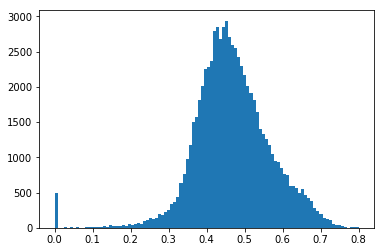

In [25]:
from sklearn.neighbors import NearestNeighbors,KDTree,BallTree,LSHForest,NearestCentroid
from pyvis.network import Network
import yaml

print('Loading config file')

with open("../config.yaml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)


DISTANCE = float(cfg['match_distance'])
DST_FOLDER = cfg['destination_folder']

print('Extracting Video Signatures')
sm = SimilarityModel()
video_signatures = sm.predict(VIDEO_LEVEL_SAVE_FOLDER)
video_signatures = np.nan_to_num(video_signatures)
labels = np.array([x.split('_vgg')[0].split('/')[-1] for x in  sm.index])

def filter_results(distances,indexes,thr):
    results = []
    results_distances = []
    msk = distances < thr
    for i,r in enumerate(msk):
        results.append(indexes[i,r])
        results_distances.append(distances[i,r])
    return results,results_distances


def evaluate_match_based(video_space,estimator,plot=True,thr=0.4):
    
    estimator.fit(video_space)
    distances,indexes = estimator.kneighbors(video_space,n_neighbors=20)
    if plot == True:
        plt.hist(distances[:,1::].ravel(),bins=100)
        
    
    results,results_distances = filter_results(distances,indexes,thr)
    
    net = Network(notebook=True,height='1000px',width='1000px')
    net.barnes_hut()

    for i,l in enumerate(labels):
        net.add_node(str(i),label=str(l))

    for i,d in enumerate(results):
        for j,m in enumerate(d):
            if j != 0:
                net.add_edge(str(i),str(m),weight=str(results_distances[i][j]))

    net.show_buttons(filter_=['physics'])
    net.show('mygraph.html')
    return net
    
    

print('Building Network Graph....')
nearest_neighbor_net = evaluate_match_based(video_signatures,NearestNeighbors(n_neighbors=50,metric='euclidean',algorithm='kd_tree'),thr=0.3)

NETWORK_VIS_PATH = DST_FOLDER  + '/nn.html'

print('Saving to :',NETWORK_VIS_PATH)
nearest_neighbor_net.show(NETWORK_VIS_PATH)

In [7]:
! pip install -e ../.

Obtaining file:///home/felipeb/winnow
  Found existing installation: winnow 0.1.0
    Uninstalling winnow-0.1.0:
      Successfully uninstalled winnow-0.1.0
  Running setup.py develop for winnow
